In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import os
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.min_rows', 10)

#set directory to WSU onedrive

os.chdir(r'C:\Users\brand\OneDrive - Washington State University (email.wsu.edu)\Documents\CptS_575\project')


In [2]:
#import data
# sub_lon = pd.read_csv('substation_long_2016_thru_2020.csv')
# tot_load = pd.read_csv('total_load_2016_thru_2020.csv')

In [3]:
#only mw_hours and temp_f have NAN values
#21495 NAN values total
#sub_lon.isna().sum()

In [4]:
#drops 18365 rows. temp_f only missing where mw_hour also missing
#sub_lon = sub_lon.dropna().reset_index(drop = True)

In [5]:
# sub_lon.describe()

In [6]:
# tot_load.head(3)
#total_load has no NA values
#tot_load.isnull().values.any()

In [7]:
#merge total_load and sub_lon
#df = sub_lon.merge(tot_load[['datetime_stamp','total_district_load']], how = 'left', on = 'datetime_stamp')

In [8]:
# #missing values handled, now look for outliers
# #tips from Peter:

# there are 6 negative temperatures that are too extreme

# #sort by temp_f, remove 6 outlier temps
#df = df.sort_values(by = ['temp_f']).iloc[6:,:]

# there should not be any MW-hours in the thousands
#df = df[df.mw_hours < 1000]

#check for any major spikes in mw_hours or temp_f that might indicate a data error

# #assign 0 to values less than .1, else remain the same
#df.mw_hours = df.mw_hours.apply(lambda x: 0 if x < .1 else x) 

# #need to remove observation where 0 appears
#df= df[df['mw_hours'] != 0]

# #create month
# df['Month'] = df['timestamp_utc'].dt.month

# #create year
# df['Year'] = df['timestamp_utc'].dt.year

# #create week
# df['Week'] = df['timestamp_utc'].dt.week

# #create day of week number
# df['DOW_num'] = df['timestamp_utc'].dt.dayofweek

# #create 31 days of month
# df['DOM'] = df['timestamp_utc'].dt.day

# df

# df.to_csv('power_cln.csv', index = False)

In [9]:
df = pd.read_csv('power_cln.csv', infer_datetime_format = True, parse_dates = ['timestamp_utc'],index_col = ['timestamp_utc'])
df

,datetime_stamp,sub_loc,mw_hours,sub_category,temp_loc,temp_f,total_district_load,Month,Year,Week,DOW_num,DOM
timestamp_utc,,,,,,,,,,,,
2017-01-04 15:00:00,2017-01-04 07:00:00,b,7.795455,res_rural,b,-13.182692,489.530669,1,2017,1,2,4
2017-01-04 16:00:00,2017-01-04 08:00:00,b,7.748442,res_rural,b,-13.161539,475.660316,1,2017,1,2,4
2017-01-04 14:00:00,2017-01-04 06:00:00,b,7.532275,res_rural,b,-12.829167,476.609317,1,2017,1,2,4
2017-01-07 15:00:00,2017-01-07 07:00:00,b,8.638972,res_rural,b,-12.674039,466.023318,1,2017,1,5,7
2017-01-07 14:00:00,2017-01-07 06:00:00,b,8.304009,res_rural,b,-12.340385,454.708689,1,2017,1,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31 23:00:00,2020-07-31 16:00:00,f,10.582432,res_urban,e,111.198453,254.931262,7,2020,31,4,31
2020-07-31 23:00:00,2020-07-31 16:00:00,i,7.347355,commercial,e,111.198453,254.931262,7,2020,31,4,31
2020-07-31 23:00:00,2020-07-31 16:00:00,g,13.109431,industrial,e,111.198453,254.931262,7,2020,31,4,31


In [10]:
#df['timestamp_utc'] = pd.to_datetime(df['timestamp_utc']).dt.tz_localize(None)

In [80]:
dailydata = df.resample('D').mean()

In [81]:
dailydata

,mw_hours,temp_f,total_district_load,Month,Year,Week,DOW_num,DOM,temp<60,temp>60
timestamp_utc,,,,,,,,,,
2016-01-01,12.205048,8.263954,370.133319,1.0,2016.0,53.0,4.0,1.0,1.0,0.0
2016-01-02,11.893200,13.063444,353.050494,1.0,2016.0,53.0,5.0,2.0,1.0,0.0
2016-01-03,12.119996,11.401546,360.817631,1.0,2016.0,53.0,6.0,3.0,1.0,0.0
2016-01-04,11.591366,19.790247,328.596417,1.0,2016.0,1.0,0.0,4.0,1.0,0.0
2016-01-05,10.796844,26.704236,295.952990,1.0,2016.0,1.0,1.0,5.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,9.925608,28.648143,290.509496,12.0,2020.0,52.0,6.0,27.0,1.0,0.0
2020-12-28,9.941870,31.040838,283.397666,12.0,2020.0,53.0,0.0,28.0,1.0,0.0
2020-12-29,10.250505,30.157879,290.697239,12.0,2020.0,53.0,1.0,29.0,1.0,0.0


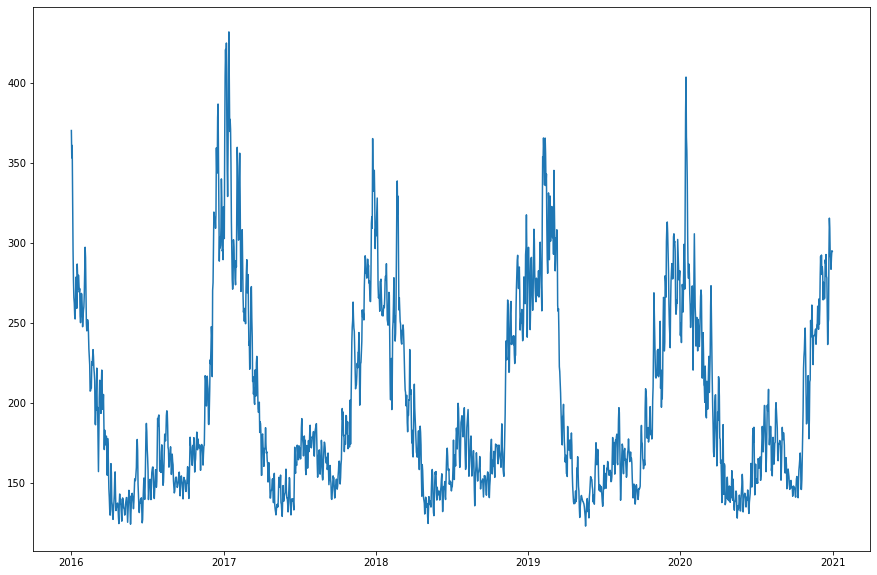

In [82]:
#pattern of overall power usage
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
plt.plot(dailydata['total_district_load'])

In [14]:
#df['date'] = df.timestamp_utc.datetime.now().date()

In [15]:
df = df[df['Year'] != 2021]

In [16]:
df.dtypes

datetime_stamp          object
sub_loc                 object
mw_hours               float64
sub_category            object
temp_loc                object
temp_f                 float64
total_district_load    float64
Month                    int64
Year                     int64
Week                     int64
DOW_num                  int64
DOM                      int64
dtype: object

In [17]:
df.groupby('Year').sum()

,mw_hours,temp_f,total_district_load,Month,Week,DOW_num,DOM
Year,,,,,,,
2016,576256.275810,3.899375e+06,1.421574e+07,505631,2066692,227699,1196971
2017,670587.350464,4.011917e+06,1.676599e+07,535813,2184583,242220,1266849
2018,659841.803632,4.311389e+06,1.660306e+07,544875,2204448,252563,1327611
2019,705163.382018,4.274842e+06,1.786752e+07,564580,2285588,260279,1365809
2020,662093.776079,4.443585e+06,1.722859e+07,562875,2327109,260037,1368870


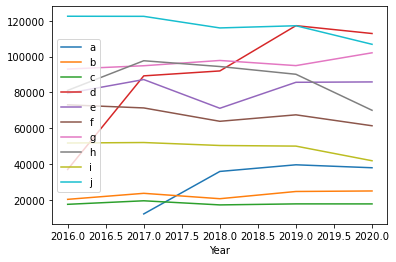

In [18]:
#what sub location has expereinced the most growth in mw_hours 2016-2020?
from matplotlib import pyplot as plt

dfyearsum = df.groupby(['Year','sub_loc'], as_index = False)['mw_hours'].sum()

fig, ax = plt.subplots()

# key gives the group name (i.e. category), data gives the actual values
for key, data in dfyearsum.groupby('sub_loc'):
    data.plot(x='Year', y='mw_hours', ax=ax, label=key)

<AxesSubplot:xlabel='temp_f', ylabel='total_district_load'>

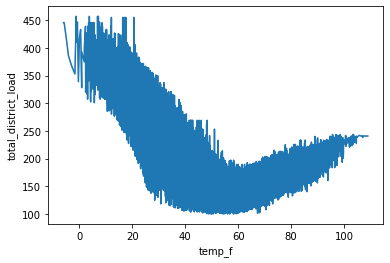

In [21]:
#how does energy use change with respect to temperature in 2019? Extremes demand most power, winter more power overall
#must control for temp > and temp < 60?
import seaborn as sns
df2019 = df[df['Year'] == 2019]
sns.lineplot(data = df2019, x = 'temp_f', y = 'total_district_load', )

In [22]:
#create dummy vars for temp ranges
#ideally could create var 'degrees below/above 60 to more accurately capture relationship'
df['temp<60'] = df.temp_f.apply(lambda x: 1 if x < 60 else 0)
df['temp>60'] = df.temp_f.apply(lambda x: 1 if x > 60 else 0)

<ipython-input-22-0f90ee4ad6c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temp<60'] = df.temp_f.apply(lambda x: 1 if x < 60 else 0)
<ipython-input-22-0f90ee4ad6c5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temp>60'] = df.temp_f.apply(lambda x: 1 if x > 60 else 0)


In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
def forecasts(act,pred):
    scores=[]
    for i in range(act.shape[1]):
        mse=mean_squared_error(act[:,i],pred[:,i])
        rmse=np.sqrt(mse)
        scores.append(rmse)
    s=0
    for row in range(act.shape[0]):
        for col in range(act.shape[1]):
            s+=(act[row,col]-pred[row,col])**2
    score=np.sqrt(s/(act.shape[0]*act.shape[1]))
    return score,scores

In [40]:
#AFTER THIS POINT NO PREDICTION MODELS BELOW ARE USED IN THE PAPER
#POINT OF FUTURE WORK
dailydata = dailydata[dailydata['Year'] != 2021]

In [104]:
from sklearn.model_selection import train_test_split
X = dailydata.drop(columns = ['total_district_load','mw_hours','Month','Week','DOW_num','DOM'])
y = dailydata['total_district_load']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)

In [106]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [149]:
# create new df from total_district_load column
tdl_model = dailydata[['total_district_load']]

#insert new col with previous day's tdl values
tdl_model.loc[:,'tdl-1'] = tdl_model.loc[:,'total_district_load'].shift()

#difference between yesterday and day before yesterday's tdl values.
tdl_model.loc[:,'tdl_diff'] = tdl_model.loc[:,'Yesterday'].diff()

#drop NA
tdl_model = tdl_model.dropna()

C:\Users\brand\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\brand\Anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [150]:
#add back temp_f data to model
tdl_model = tdl_model.merge(dailydata['temp_f'], on= 'timestamp_utc', how = 'left')

In [137]:
tdl_model

,total_district_load,Yesterday,Yesterday_Diff,temp_f
timestamp_utc,,,,
2016-01-03,360.817631,353.050494,-17.082825,11.401546
2016-01-04,328.596417,360.817631,7.767137,19.790247
2016-01-05,295.952990,328.596417,-32.221214,26.704236
2016-01-06,276.679230,295.952990,-32.643427,30.536873
2016-01-07,265.646793,276.679230,-19.273760,31.904408
...,...,...,...,...
2020-12-27,290.509496,292.314847,-16.914866,28.648143
2020-12-28,283.397666,290.509496,-1.805351,31.040838
2020-12-29,290.697239,283.397666,-7.111830,30.157879


In [133]:
X_train = tdl_model[:'2016'].drop(['total_district_load'], axis = 1)
y_train = tdl_model.loc[:'2016', 'total_district_load']
X_test = tdl_model['2017'].drop(['total_district_load'], axis = 1)
y_test = tdl_model.loc['2017', 'total_district_load']

LR: -0.544814 (3.029334)
KNN: -0.056855 (1.162748)
RF: 0.152095 (0.956163)


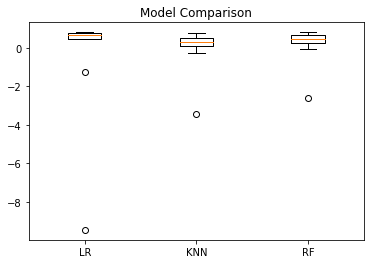

In [136]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10)))

results = []
names = []
for name, model in models:
#cross validation
 tscv = TimeSeriesSplit(n_splits=10)
    
 cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
#plot for model comparison
plt.boxplot(results, labels=names)
plt.title('Model Comparison')
plt.show()

In [145]:
from sklearn.metrics import make_scorer
def rmse(actual, predict):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score
rmse_score = make_scorer(rmse, greater_is_better = False)

In [146]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}
tscv = TimeSeriesSplit(n_splits=10)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

In [147]:
y_true = y_test.values
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)

explained_variance:  0.9698
mean_squared_log_error:  0.0026
r2:  0.9637
MAE:  8.6325
MSE:  167.5186
RMSE:  12.9429


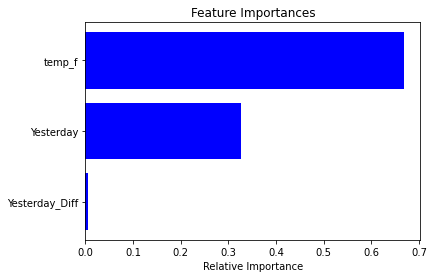

In [148]:
imp = best_model.feature_importances_
features = X_train.columns
indices = np.argsort(imp)
plt.title('Feature Importance')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
df.groupby('sub_category').total_district_load.sum().plot.barh(x='Location', y='total_district_load')

In [ ]:
df.groupby('sub_loc').total_district_load.sum().plot.barh(x='Location', y='total_district_load')

In [ ]:
plt.style.use('ggplot')

x = ['2016', '2017', '2018', '2019', '2020']
energy = [1421574, 1676599, 1660306, 1786752, 1722859]
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, energy, color='green')
plt.xlabel("Year")
plt.ylabel("Energy (MWH)")
plt.title("Total District Load by Year")
plt.xticks(x_pos, x)
plt.show()

In [ ]:
#subset substation locations
dfa = df[df['sub_loc'] == 'a']
dfb = df[df['sub_loc'] == 'b']
dfc = df[df['sub_loc'] == 'c']
dfd = df[df['sub_loc'] == 'd']

In [ ]:
dfa